# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols : str, list[str]
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a a dataframe as its first argument and ``group_cols`` as a keyword argument
            (``group_cols`` is passed through) and return a DataFrame, Series or scal

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.452587   
                        W/m^2 Radiative Forcing                 0.444559   
                        ppm   Atmospheric Concentrations|CO2    0.562336   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.580632   
                        W/m^2 Radiative Forcing                 0.874132   
                        ppm   Atmospheric Concentrations|CO2    1.060732   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.938330   
                        W/m^2 Radiative Forcing                 1.811230   
                        ppm   Atmospheric Concentrations|CO2    1.618653   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.663027   
                        W/m^2 Radiative Forcing                 2.499820   
                        ppm   Atmospheric Concentrations|CO2    1.700930   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.864356   
                        W/m^2 Radiative Forcing                 2.358697   
                        ppm   Atmospheric Concentrations|CO2    2.115048   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.587844   
                        W/m^2 Radiative Forcing                 3.736462   
                        ppm   Atmospheric Concentrations|CO2    3.152175   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.407880   
                        W/m^2 Radiative Forcing                 3.406322   
                        ppm   Atmospheric Concentrations|CO2    2.181407   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               3.014412   
                        W/m^2 Radiative Forcing                 3.197607   
                        ppm   Atmospheric Concentrations|CO2    4.189355   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               5.126450  ...   
                        W/m^2 Radiative Forcing                 3.812492  ...   
                        ppm   Atmospheric Concentrations|CO2    3.978077  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.453807   
                        W/m^2 Radiative Forcing                 0.467036   
                        ppm   Atmospheric Concentrations|CO2    0.513133   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.410312   
                        W/m^2 Radiative Forcing                 0.957697   
                        ppm   Atmospheric Concentrations|CO2    1.080487   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.548581   
                        W/m^2 Radiative Forcing                 2.005045   
                        ppm   Atmospheric Concentrations|CO2    1.537153   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.606145   
                        W/m^2 Radiative Forcing                 2.639219   
                        ppm   Atmospheric Concentrations|CO2    1.701291   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.353334   
                        W/m^2 Radiative Forcing                 2.333640   
                        ppm   Atmospheric Concentrations|CO2    1.621277   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.002492   
                        W/m^2 Radiative Forcing                 4.638742   
                        ppm   Atmospheric Concentrations|CO2    3.499910   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.274656   
                        W/m^2 Radiative Forcing                 2.900087   
                        ppm   Atmospheric Concentrations|CO2    2.261081   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.527076   
                        W/m^2 Radiative Forcing                 2.562208   
                        ppm   Atmospheric Concentrations|CO2    4.830269   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               5.134717  ...   
                        W/m^2 Radiative Forcing                 2.507436  ...   
                        ppm   Atmospheric Concentrations|CO2    3.206538  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, group_cols, axis=0):
    # Take a mean across the group and then invert the result
    # Functions passed to `process_over` have to take a
    # `group_cols` argument, even if it's not used
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                   -0.0   
                        W/m^2 Radiative Forcing                     -0.0   
                        ppm   Atmospheric Concentrations|CO2        -0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -0.452587   
                        W/m^2 Radiative Forcing                -0.444559   
                        ppm   Atmospheric Concentrations|CO2   -0.562336   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -0.580632   
                        W/m^2 Radiative Forcing                -0.874132   
                        ppm   Atmospheric Concentrations|CO2   -1.060732   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -0.938330   
                        W/m^2 Radiative Forcing                -1.811230   
                        ppm   Atmospheric Concentrations|CO2   -1.618653   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -1.663027   
                        W/m^2 Radiative Forcing                -2.499820   
                        ppm   Atmospheric Concentrations|CO2   -1.700930   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -1.864356   
                        W/m^2 Radiative Forcing                -2.358697   
                        ppm   Atmospheric Concentrations|CO2   -2.115048   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -2.587844   
                        W/m^2 Radiative Forcing                -3.736462   
                        ppm   Atmospheric Concentrations|CO2   -3.152175   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -2.407880   
                        W/m^2 Radiative Forcing                -3.406322   
                        ppm   Atmospheric Concentrations|CO2   -2.181407   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -3.014412   
                        W/m^2 Radiative Forcing                -3.197607   
                        ppm   Atmospheric Concentrations|CO2   -4.189355   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature              -5.126450  ...   
                        W/m^2 Radiative Forcing                -3.812492  ...   
                        ppm   Atmospheric Concentrations|CO2   -3.978077  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    K      Surface Temperature              -25.641610
                 1       ssp119    K      Surface Temperature              -24.785785
                 2       ssp119    K      Surface Temperature              -25.950448
                 3       ssp119    K      Surface Temperature              -25.719816
                 4       ssp119    K      Surface Temperature              -27.871858
                 5       ssp119    K      Surface Temperature              -25.483164
                 6       ssp119    K      Surface Temperature              -26.932889
                 7       ssp119    K      Surface Temperature              -24.180022
                 8       ssp119    K      Surface Temperature              -24.815059
                 9       ssp119    K      Surface Temperature              -25.007280
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.255051   
                        W/m^2 Radiative Forcing                 0.103180   
                        ppm   Atmospheric Concentrations|CO2    0.283147   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.111110   
                        W/m^2 Radiative Forcing                 0.315999   
                        ppm   Atmospheric Concentrations|CO2    0.539476   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.328317   
                        W/m^2 Radiative Forcing                 0.677671   
                        ppm   Atmospheric Concentrations|CO2    0.812929   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.642835   
                        W/m^2 Radiative Forcing                 1.357632   
                        ppm   Atmospheric Concentrations|CO2    0.464300   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.366294   
                        W/m^2 Radiative Forcing                 1.166626   
                        ppm   Atmospheric Concentrations|CO2    0.310175   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.400556   
                        W/m^2 Radiative Forcing                 1.569278   
                        ppm   Atmospheric Concentrations|CO2    1.065197   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.888252   
                        W/m^2 Radiative Forcing                 2.064677   
                        ppm   Atmospheric Concentrations|CO2    0.788293   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.164711   
                        W/m^2 Radiative Forcing                 1.740919   
                        ppm   Atmospheric Concentrations|CO2    2.639366   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               3.221107  ...   
                        W/m^2 Radiative Forcing                 1.947529  ...   
                        ppm   Atmospheric Concentrations|CO2    1.120425  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   K     Surface Temperature            0.05             0.0   
                        W/m^2 Radiative Forcing              0.05             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.05             0.0   
                        K     Surface Temperature            0.17             0.0   
                        W/m^2 Radiative Forcing              0.17             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0   
                        K     Surface Temperature            0.5              0.0   
                        W/m^2 Radiative Forcing              0.5              0.0   
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0   
                        K     Surface Temperature            0.83             0.0   
                        W/m^2 Radiative Forcing              0.83             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0   
                        K     Surface Temperature            0.95             0.0   
                        W/m^2 Radiative Forcing              0.95             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0   
                        K     Surface Temperature            mean             0.0   
                        W/m^2 Radiative Forcing              mean             0.0   
                        ppm   Atmospheric Concentrations|CO2 mean             0.0   
                        K     Surface Temperature            median           0.0   
                        W/m^2 Radiative Forcing              median           0.0   
                        ppm   Atmospheric Concentrations|CO2 median           0.0   

time                                                                   2001-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   K     Surface Temperature            0.05        0.113442   
                        W/m^2 Radiative Forcing              0.05        0.062395   
                        ppm   Atmospheric Concentrations|CO2 0.05        0.225368   
                        K     Surface Temperature            0.17        0.255051   
                        W/m^2 Radiative Forcing              0.17        0.103180   
                        ppm   Atmospheric Concentrations|CO2 0.17        0.283147   
                        K     Surface Temperature            0.5         0.453807   
                        W/m^2 Radiative Forcing              0.5         0.467036   
                        ppm   Atmospheric Concentrations|CO2 0.5         0.513133   
                        K     Surface Temperature            0.83        0.687947   
                        W/m^2 Radiative Forcing              0.83        0.734346   
                        ppm   Atmospheric Concentrations|CO2 0.83        0.908094   
                        K     Surface Temperature            0.95        0.790509   
                        W/m^2 Radiative Forcing              0.95        0.805935   
                        ppm   Atmospheric Concentrations|CO2 0.95        0.975285   
                        K     Surface Temperature            mean        0.452587   
                        W/m^2 Radiative Forcing              mean        0.444559   
                        ppm   Atmospheric Concentrations|CO2 mean        0.562336   
                        K     Surface Temperature            median      0.453807   
                        W/m^2 Radiative Forcing              median      0.467036   
                        ppm   Atmospheric Concentrations|CO2 median      0.513133   

time                                                                   2002-01-01  \
mod

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

/Users/znicholls/Documents/AGCEC/MCastle/scmdata/src/scmdata/run.py:168: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x124446310>])

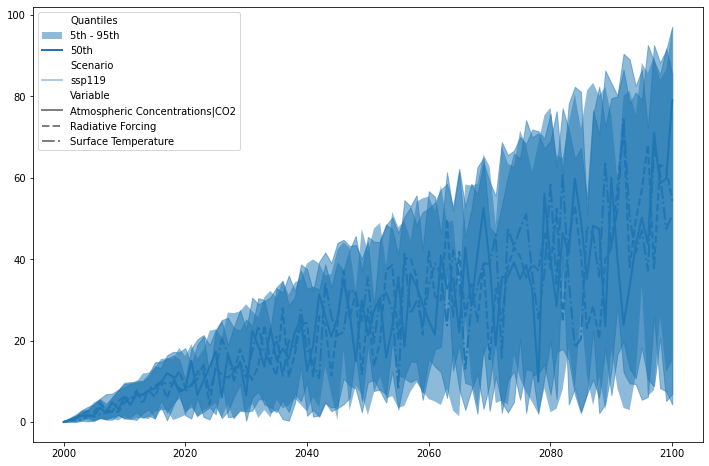

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x12491a290>])

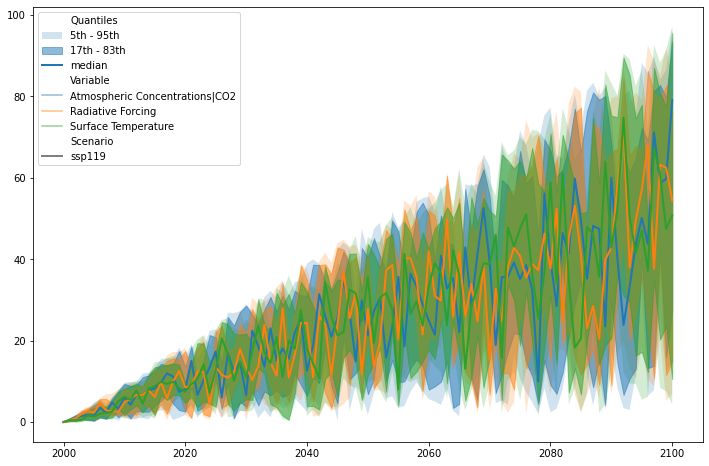

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119      K             Surface Temperature
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	3   example     0.17  World   ssp119      K             Surface Temperature
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	6   example      0.5  World   ssp119      K             Surface Temperature
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	9   example     0.83  World   ssp119      K             Surface Temperature
	10  example     0.83  World   ssp11

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x124a5db90>])

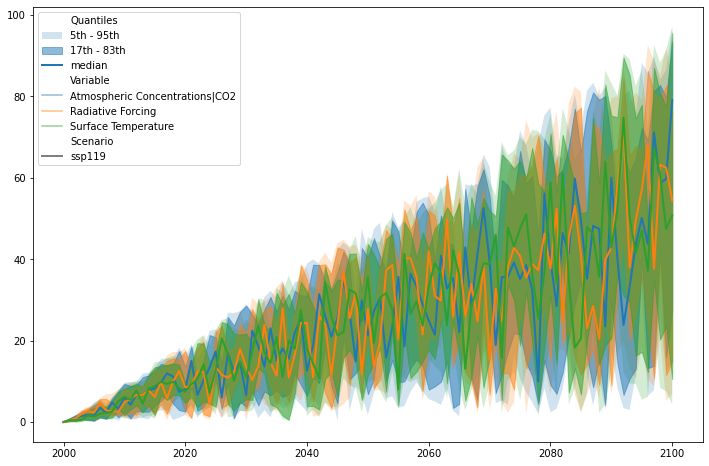

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

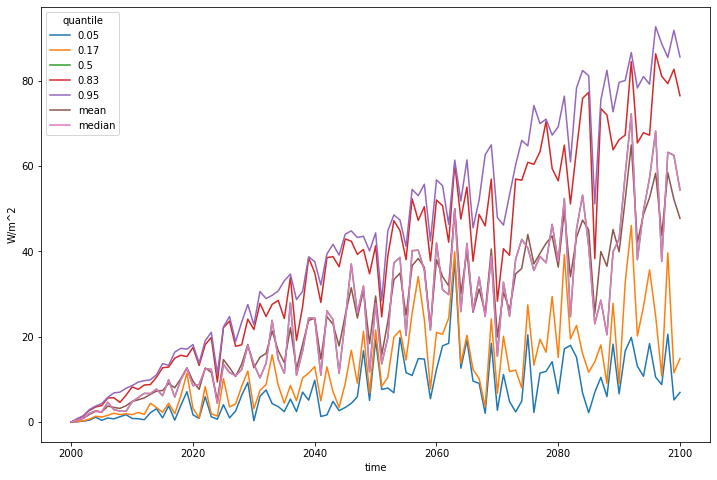

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)